<a href="https://colab.research.google.com/github/GraceJulius/FDSFE_GJulius/blob/main/Class%20Demo/LineFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/walkingspeed_Bettencourt07.csv", header = None, names=["population", "wspeed", "city"])

In [8]:
df

,population,wspeed,city
0,2520.0,2.28,Itea
1,370.0,2.79,Psychro
2,5650.0,3.37,Netanya
3,14100.0,3.76,Corte
4,23300.0,3.31,Safed
5,52600.0,4.91,Dimona
6,73300.0,4.40,Netanya
7,77100.0,3.90,New Haven
8,145000.0,4.40,Jerusalem
9,320000.0,4.49,Brno


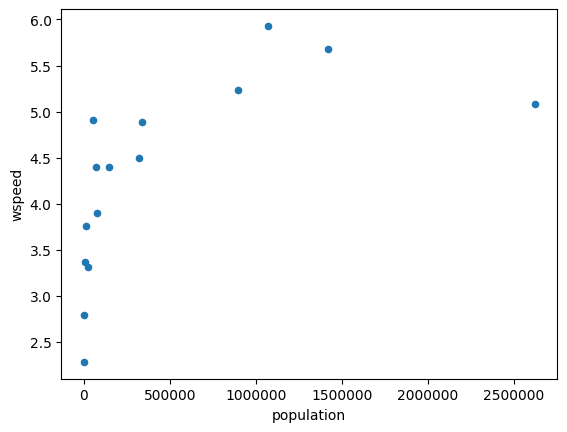

In [9]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.ticklabel_format(style="plain")

In [10]:
import numpy as np

In [12]:
df["population"] = np.log10(df["population"])

Text(0.5, 0, 'log10 population')

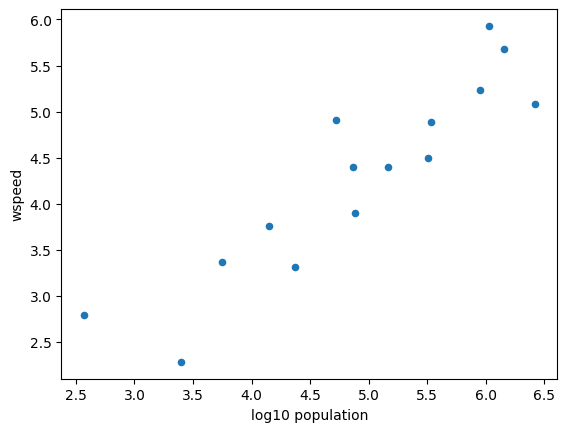

In [13]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.set_xlabel("log10 population")


Text(0.5, 0, 'log10 population')

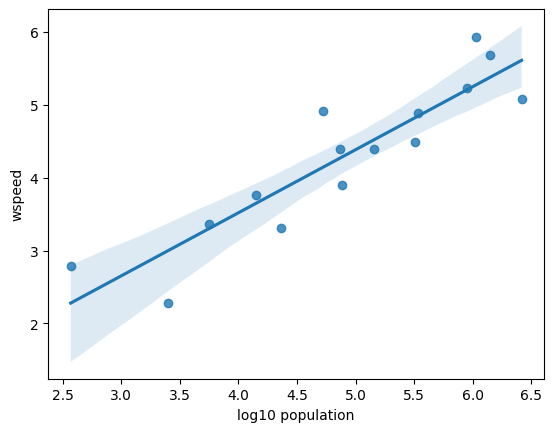

In [14]:
import seaborn as sns
ax = sns.regplot(x=df["population"], y=df["wspeed"])
ax.set_xlabel("log10 population")

In [20]:
def line(x, slope, intercept):
    y = slope * x + intercept
    return y


def SSE(y,ypred):
    return ((y - ypred)**2).sum()

To minimize the objective function

In [21]:
current_min_sse = 1e7
for slope in np.arange(0, 3, 0.01):
    for intercept in np.arange(0, 3, 0.01):
        prediction = line(df["population"], slope, intercept)
        sse = SSE(df["wspeed"], prediction)

        if sse < current_min_sse:
            current_min_sse = sse
            manual_slope = slope
            manual_intercept = intercept

print(f"Best Slope: {manual_slope:.2f}")
print(f"Best Intercept: {manual_intercept:.2f}")

Best Slope: 0.87
Best Intercept: 0.03


In [22]:
df["prediction_manual"] = line(df["population"], manual_slope, manual_intercept)

In [23]:
manual_min_sse = SSE(df["wspeed"], df["prediction_manual"])
print(f"Minimum Sum of Squared Errors achieved: {manual_min_sse:.2f}")


Minimum Sum of Squared Errors achieved: 2.76


Text(0, 0.5, 'Walking Speed (ft/s)')

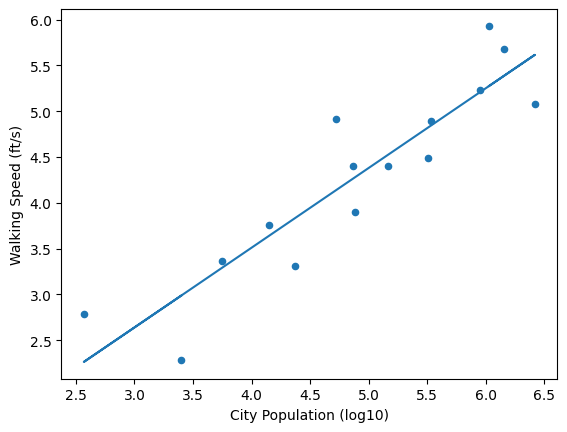

In [24]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")


In [25]:
numpy_slope, numpy_intercept = np.polyfit(df["population"], df["wspeed"], 1)

print(f"NumPy Slope: {numpy_slope:.3f}")
print(f"NumPy Intercept: {numpy_intercept:.3f}")

NumPy Slope: 0.865
NumPy Intercept: 0.057


Text(0, 0.5, 'Walking Speed (ft/s)')

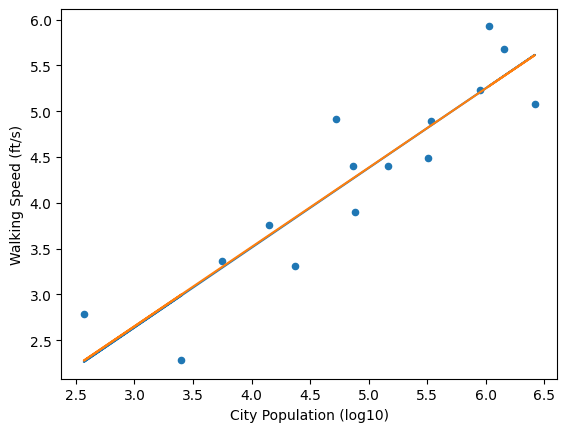

In [26]:
df["prediction_numpy"] = line(df["population"], numpy_slope, numpy_intercept)
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.plot(df["population"], df["prediction_numpy"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")


In [29]:
from sklearn.linear_model import LinearRegression


In [30]:
reg = LinearRegression().fit(df["population"].values.reshape(-1,1), df["wspeed"].values)

In [32]:
score=reg.score(df["population"].values.reshape(-1,1), df["wspeed"].values)
print(f"Score of linear regression from sklearn: {score:.2f}")

Score of linear regression from sklearn: 0.82


In [33]:
df["prediction_sklearn"] = reg.predict(df["population"].values.reshape(-1,1))

Text(0, 0.5, 'Walking Speed (ft/s)')

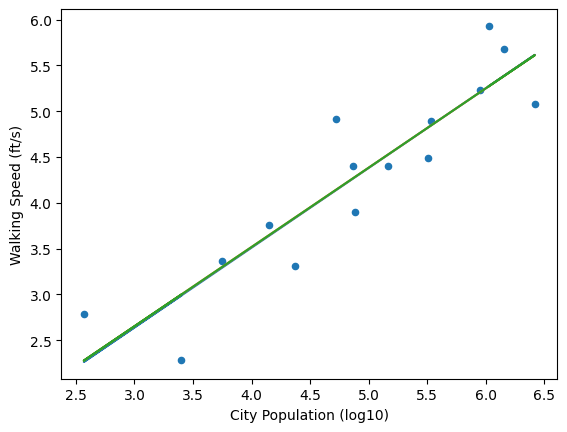

In [34]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.plot(df["population"], df["prediction_numpy"])
ax.plot(df["population"], df["prediction_sklearn"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")
